<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Гипотезы-о-распределениях" data-toc-modified-id="Гипотезы-о-распределениях-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Гипотезы о распределениях</a></span></li><li><span><a href="#1.-Критерий-Колмогорова" data-toc-modified-id="1.-Критерий-Колмогорова-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1. Критерий Колмогорова</a></span><ul class="toc-item"><li><span><a href="#Упражнение-1-(искусство-требует-генераций)" data-toc-modified-id="Упражнение-1-(искусство-требует-генераций)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Упражнение 1 (искусство требует генераций)</a></span></li><li><span><a href="#Упражнение-2-(акции)" data-toc-modified-id="Упражнение-2-(акции)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Упражнение 2 (акции)</a></span></li><li><span><a href="#Упражнение-3-(однородность)" data-toc-modified-id="Упражнение-3-(однородность)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Упражнение 3 (однородность)</a></span></li></ul></li><li><span><a href="#2.-Критерий-Пирсона" data-toc-modified-id="2.-Критерий-Пирсона-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2. Критерий Пирсона</a></span><ul class="toc-item"><li><span><a href="#Упражнение-4-(число-пи)" data-toc-modified-id="Упражнение-4-(число-пи)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Упражнение 4 (число пи)</a></span></li><li><span><a href="#Упражнение-5-(снова-однородность)" data-toc-modified-id="Упражнение-5-(снова-однородность)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Упражнение 5 (снова однородность)</a></span></li></ul></li></ul></div>




#  Гипотезы о распределениях

В этой тетрадке мы немного поработаем с гипотезами о распределениях.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# 1. Критерий Колмогорова


__Гипотеза о неизвестном законе распределения:__ 

$$
\begin{aligned}
H_0 : X \sim F_0 \\
H_1 : X \nsim F_0
\end{aligned}
$$

__Статистика:__ 

$$
K_n = \sqrt{n} \cdot \sup_{x} \mid \hat F_n(x) - F(x) \mid 
$$

При справедливости нулевой гипотезы распределение статистики $K_n$ одинаково для любого исходного непрерывного распределения.

## Упражнение 1 (искусство требует генераций)

Попробуем провести тест Колмогорова на нескольких искуственных примерах. 

In [33]:
x = stats.norm(loc=5, scale=3).rvs(1000)

mu, sigma = x.mean(), x.std(ddof=1)

stat, pvalue = stats.kstest(x, 'norm', args=(mu, sigma))

stat, pvalue

(0.015434095203167186, 0.9681247575712719)

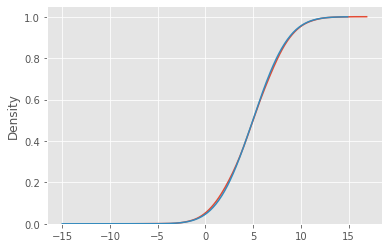

In [44]:
sns.kdeplot(x, cumulative=True);

xs = np.arange(-15,15,0.1)
plt.plot(xs, stats.norm.cdf(xs, loc=mu, scale=sigma))


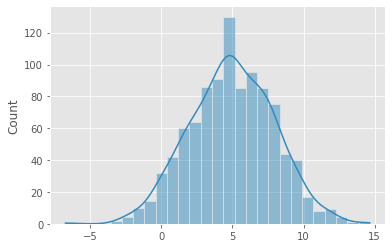

In [46]:
sns.histplot(x, kde=True);

In [47]:
# X имеет нормальное распределение с mu и сигма ниже 
(x.mean(), x.std(ddof=1))



(4.961963888887056, 2.9559012804916778)

In [48]:
# при p-value
pvalue

0.9681247575712719

Гипотеза о нормальности для выборки, сгенерированной из нормального распределения не отвергается. Сгенерируем выборку из равномерного распределения, а после протестируем гипотезу о нормальности.  

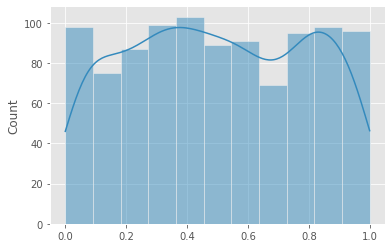

In [50]:
x = stats.uniform(0,1).rvs(1000)
sns.histplot(x, kde=True);

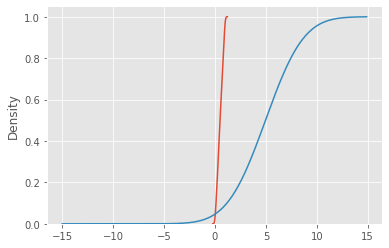

In [51]:
sns.kdeplot(x, cumulative=True);

xs = np.arange(-15,15,0.1)
plt.plot(xs, stats.norm.cdf(xs, loc=mu, scale=sigma))


In [23]:
stats.kstest(x, 'norm', args=(x.mean(), x.std(ddof=1)))

KstestResult(statistic=0.06489186576115852, pvalue=0.00041880790042070505)

Видим, что $p\_value$ очень низкое. Гипотеза о нормальности отвергается. По аналогии можно протестировать гипотезу для любого распределения. Вот пример с экспоненциальным распределением: 

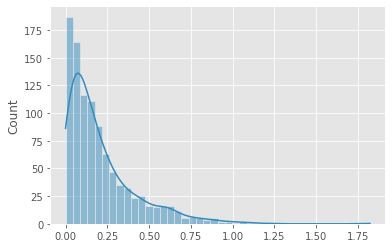

In [57]:
x = stats.expon(scale=0.2).rvs(1000)
sns.histplot(x, kde=True);

In [58]:
stats.kstest(x, 'expon', args=(0, x.mean()))

KstestResult(statistic=0.023959880963020708, pvalue=0.6055354400163353)

Первый аргумент отвечает за `loc` (экспоненциальное распределение со сдвигом). Он равен нулю.

## Упражнение 2 (акции)

Подгрузим данные о стоимости акций Яндекса в течение последних $10$ лет.

In [61]:
df = pd.read_csv('../data/ynd.tsv', sep='\t')
df['fielddate'] = pd.to_datetime(df['fielddate'])
df.set_index('fielddate', inplace=True)
print(df.shape)
df.head()

(2291, 6)


,open,high,low,close,volume,adjusted
fielddate,,,,,,
2011-05-24,35.000000,42.009998,30.549999,38.840000,70186700.0,38.840000
2011-05-25,37.750000,37.900002,34.400002,35.000000,11761600.0,35.000000
2011-05-26,34.450001,35.450001,34.000000,34.770000,4417500.0,34.770000
2011-05-27,34.750000,35.000000,34.000000,34.450001,2006000.0,34.450001
2011-05-31,34.950001,35.369999,32.610001,33.450001,3981100.0,33.450001


Обычно финансисты работают с доходностями:

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

In [62]:
r = (df.close.diff()/df.close.shift(1)).dropna()
r

fielddate
2011-05-25   -0.098867
2011-05-26   -0.006571
2011-05-27   -0.009203
2011-05-31   -0.029028
2011-06-01   -0.035874
                ...   
2020-06-24    0.026531
2020-06-25    0.004970
2020-06-26   -0.030069
2020-06-29    0.004283
2020-06-30    0.015841
Name: close, Length: 2290, dtype: float64

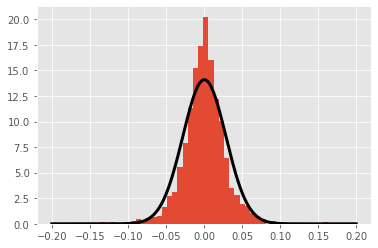

In [63]:
r.hist(bins=50, density=True);

xs = np.linspace(-0.2, 0.2, 300)
ys = stats.norm(loc=r.mean(), scale=r.std(ddof=1)).pdf(xs)
plt.plot(xs, ys, color="black", lw=3);

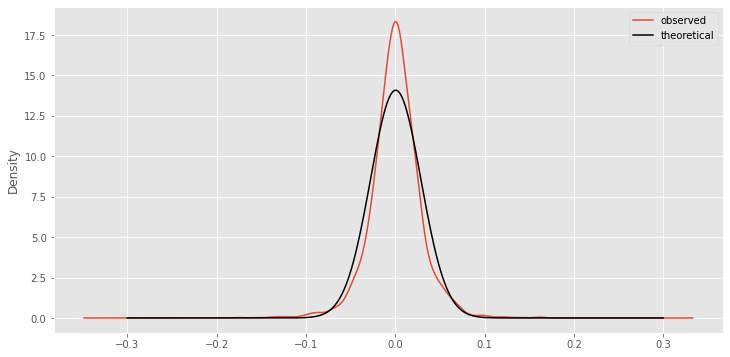

In [77]:
plt.figure(figsize=(12,6))
r.plot(kind='kde', label='observed')

xs = np.linspace(-0.3, 0.3, 300)
ys = stats.norm(loc=r.mean(), scale=r.std(ddof=1)).pdf(xs)
plt.plot(xs, ys, color="black", label='theoretical')
plt.legend();

 Как это не странно, оно оказывается куполообразным. Издали распределение напоминает собой нормальное. Однако это ещё не факт. Можно заметить, что у распределения довольно тяжёлые хвосты. Чтобы увидеть это построим диаграмму квантиль-квантиль. Она позволяет сравнить выборочное распределение с теоретическим. 

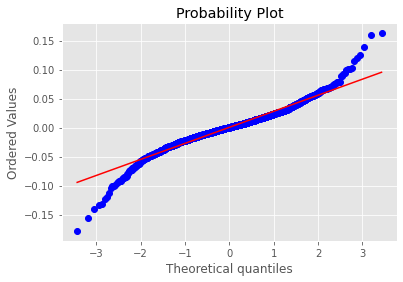

In [8]:
stats.probplot(r, dist="norm", plot=plt);

На диаграмме по оси $x$ откладываются значения из теоретического нормального распределения. По оси $y$ откладывают значения, которые фигурируют в выборке. Если бы наши наблюдения были из нормального распределения, они бы оказались на диагонали. Центр, действительно, укладывается на неё. А вот хвосты с неё спадают. Они оказываются тяжелыми.

Проверим гипотезу тестом Колмогорова. 

In [64]:
r.mean(), r.std(ddof=1)

(0.0005134013394187065, 0.02832192239992791)

In [65]:
stats.kstest(r, 'norm', args=(r.mean(), r.std(ddof=1)))

KstestResult(statistic=0.05845783509742092, pvalue=3.035955008496118e-07)

Гипотеза о нормальности отвергается, p_value оказалось очень маленьким. Обычно доходности моделируют с помощью распределений с тяжёлыми хвостами. Попробуем проверить ту же самую гипотезу, но с помощью критерия, специфицированного под хвосты [(Андерсона-Дарлинга)](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.normal_ad.html#statsmodels.stats.diagnostic.normal_ad): мы переносим на хвосты распределения дополнительный вес, чтобы критерий был к ним более чувствительным. 

In [66]:
from statsmodels.stats.diagnostic import normal_ad
pval = normal_ad(r)
pval # гипотеза о нормальности отвергается

(19.749165127467222, 0.0)

Попробуем этот же тест для выборки из нормального распределения.

In [12]:
x = stats.norm(loc=5, scale=3).rvs(1000)
normal_ad(x)  # гипотеза о нормальности не отвергается

(0.34990762231223016, 0.4724156352330838)

## Упражнение 3 (однородность)

__Ещё одно полезное свойство критерия:__ можно проверять гипотезу об однородности выборок, то есть пытаться понять из одного ли распределения они к нам пришли. Колмогоров доказал, что для этого случая распределение Колмогорова тоже подходит.

In [13]:
x = stats.norm(loc=5, scale=3).rvs(1000)
y = stats.norm(loc=5, scale=3).rvs(1000)
z = stats.expon(scale=0.2).rvs(1000)

In [14]:
stats.ks_2samp(x, y)

Ks_2sampResult(statistic=0.049, pvalue=0.18116454248303263)

In [15]:
stats.ks_2samp(x, z)

Ks_2sampResult(statistic=0.901, pvalue=0.0)

> __Важно:__  Критерий работает только для непрерывных распределений! Для дискретных ситуаций обычно используют критерий Пирсона. 

# 2. Критерий Пирсона


__Гипотеза о неизвестном законе распределения:__ 


$$
\begin{aligned}
H_0 : X \sim F_0 \\
H_1 : X \nsim F_0
\end{aligned}
$$

__Статистика:__ 

$$
\sum_{j=1}^s \frac{(v_j - n \cdot p_j(\hat \theta))^2}{n \cdot p_j(\hat \theta)} \sim \chi^2_{s - k - 1},
$$

где $\hat \theta$ - любая состоятельная оценка параметра, $v_j$ - частота, с которой значение $j$ встречалось в выборке, $p_j$ - теоретическая вероятность того, что выпадет значение $j$,  $s$ - число значений, которые может принимать случайная величина, $k$ - размерность вектора параметров $\theta$, 


## Упражнение 4 (число пи)

В десятичной записи числа $\pi$ среди первых $10002$ знаков после запятой цифры $0, 1, \dots, 9$ встречаются соответственно 968, 1026, 1021, 974, 1014, 1046, 1021, 970, 948, 1014 раз. Можно ли при уровне значимости $0.05$ считать эти цифры случайными? При каком уровне значимости эта гипотеза отвергается?

У нас есть дискретное распределение и $10$ вероятностей. Нужно проверить гипотезу о равномерности этого распределения. Будем делать это с помощью критерия Пирсона. 

In [16]:
n = 10002
X = np.array([968, 1026, 1021, 974, 1014, 1046, 1021, 970, 948, 1014])
p = X/n
p

array([0.09678064, 0.10257948, 0.10207958, 0.09738052, 0.10137972,
       0.10457908, 0.10207958, 0.0969806 , 0.09478104, 0.10137972])

In [17]:
p0 = np.array([1/10]*10)
p0

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

Статистика для теста Пирсона выглядит как

$$
\sum_{j=1}^{10} \frac{(v_j - n \cdot p_j(\hat \theta))^2}{n \cdot p_j(\hat \theta)} \sim \chi^2_{9},
$$

In [18]:
T = np.sum((X - n*p0)**2/(n*p0))
T

9.367726454709057

Статистика Пирсона имеет $\chi^2_9$. Найдём для неё критическое значения на уровне значимости $5\%$.

In [19]:
stats.chi2.ppf(0.95, df = 9)

16.918977604620448

Наблюдаемое значение меньше критического. Гипотеза о равномерности не отвергается. Найдём $p\_value$.

In [20]:
1 - stats.chi2.cdf(T, df = 9)

0.4040452075150309

Видим, что $p\_value$ на порядок выше $5\%$, значит гипотеза не отвергается. 

Ровно то же самое можно сделать встроенным тестом. 

In [21]:
from scipy.stats import chisquare
chisquare(X, f_exp=n*p0)

Power_divergenceResult(statistic=9.367726454709057, pvalue=0.40404520751503087)

> По аналогии с тестом Колмогорова, тест Пирсона можно использовать, чтобы проверять выборки на однородность. В таком случае критерий хочет получить на вход таблицу сопряжённости для двух распределений. 

## Упражнение 5 (снова однородность)

Мужчин и женщин опрашивают о их политических взглядах. Правда ли, что их распределение значимо различается. 

In [80]:
df = pd.DataFrame([[762, 327, 468],[484, 239, 477]])
df.columns = ["Democrat","Independent", "Republican"]
df.index = ["F", "M"]
df

,Democrat,Independent,Republican
F,762,327,468
M,484,239,477


In [91]:
n = df.sum().sum()
n

2757

In [87]:
df.sum()

Democrat       1246
Independent     566
Republican      945
dtype: int64

In [92]:
df.sum(axis=1)/n

F    0.564744
M    0.435256
dtype: float64

In [95]:
1246 * 0.564744

703.671024

In [81]:
df.values

array([[762, 327, 468],
       [484, 239, 477]])

In [93]:
from scipy.stats import chi2_contingency
chi, pvalue, k, expected = chi2_contingency(df.values)

In [94]:
expected

array([[703.67138194, 319.64526659, 533.68335147],
       [542.32861806, 246.35473341, 411.31664853]])

In [96]:
chi

30.070149095754672

In [97]:
pvalue

2.9535891832117595e-07

In [99]:
# (3-1)*(2-1)
k

2

Гипотеза об однородности выборок отвергается. 